In [1]:
!pip install kagglehub 

In [2]:
import kagglehub
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


<h1>1. Loading</h1>

In [3]:
# Download latest version or simply uncomment the heart = 'heart.csv line!!!
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)
heart = path +r'\heart.csv'
# heart = 'heart.csv';
print(heart)

Path to dataset files: C:\Users\DR Amr\.cache\kagglehub\datasets\johnsmith88\heart-disease-dataset\versions\2
C:\Users\DR Amr\.cache\kagglehub\datasets\johnsmith88\heart-disease-dataset\versions\2\heart.csv


In [4]:
heart = pd.read_csv(heart)
heart.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
96,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
97,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
98,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0


<h1>2. Initial Data Exploration</h1>

In [5]:

heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age: Age of the patient
sex: Gender of the patient (1 = male, 0 = female)
cp: Chest pain type (4 types)
trestbps: Resting blood pressure (in mm Hg)
chol: Serum cholesterol in mg/dl
fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
restecg: Resting electrocardiographic results (values 0, 1, 2)
thalach: Maximum heart rate achieved
exang: Exercise-induced angina (1 = yes, 0 = no)
oldpeak: ST depression induced by exercise relative to rest
slope: Slope of the peak exercise ST segment
ca: Number of major vessels (0-3) colored by fluoroscopy
thal: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)
target: Heart disease diagnosis (1 = disease, 0 = no disease)

<h1>3. Handling Missing Values</h1>

In [7]:
heart.isnull().sum()
# List of numerical columns to address
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_columns: # replacing missing with mean for all columns!
    heart[col] = heart[col].fillna(heart[col].mean())


<h1>4. Handling Duplicates
</h1>

In [8]:
heart.duplicated().sum()

723

In [9]:
heart2 = heart.drop_duplicates()
heart2.duplicated().sum()

0

In [10]:
heart=heart2

<h1>5. Standardizing the Data
</h1>


In [11]:
for col in heart.columns: # show all unique values per col!
    print(col,heart[col].unique())
'''
conversion if needed
df['sex'] = df['sex'].replace({'male': 'Male', 'M': 'Male', 'female': 'Female', 'F': 'Female'})
'''

age [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex [1 0]
cp [0 1 2 3]
trestbps [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs [0 1]
reste

"\nconversion if needed\ndf['sex'] = df['sex'].replace({'male': 'Male', 'M': 'Male', 'female': 'Female', 'F': 'Female'})\n"

<h1>6. Handling Outliers</h1>
<h3>Investigting: Visualize data distribution using boxplots:</h3>

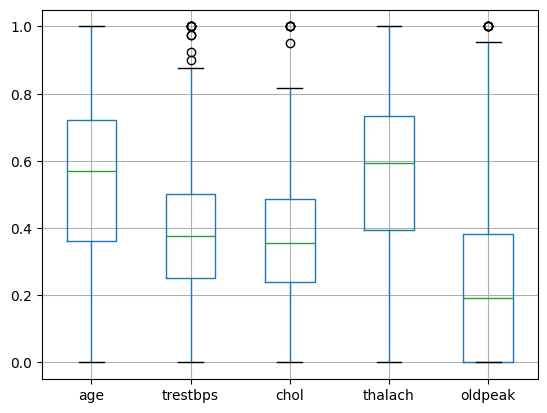

In [16]:
heart.boxplot(column=numerical_columns)
plt.show()

<h3>Correction: remove or cap outliers based on domain knowledge or percentile thresholds:</h3>

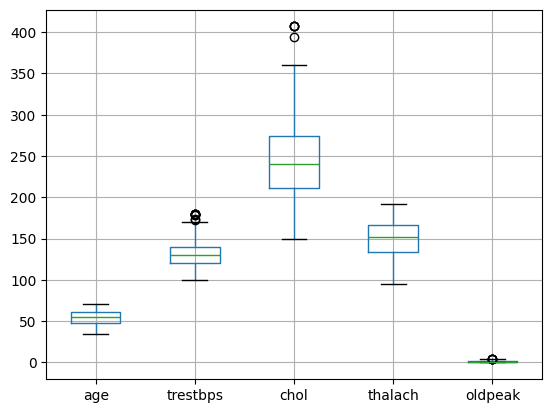

In [13]:
# Handling outliers: Capping at 1st and 99th percentiles for each numerical column
for col in numerical_columns:
    Q1 = heart[col].quantile(0.01)  # 1st percentile
    Q99 = heart[col].quantile(0.99)  # 99th percentile
    heart[col] = heart[col].clip(lower=Q1, upper=Q99)
heart.boxplot(column=numerical_columns)
plt.show()

<h1>7. Transforming Variables
</h1><h3>Scaling the features (using MinMax):</h3>

In [14]:
# Normalize numerical features (scaling to [0, 1])
scaler = MinMaxScaler()
heart[numerical_columns] = scaler.fit_transform(heart[numerical_columns])



In [15]:
# Check the result
print(heart.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.472222    1   0    0.3125  0.244309    0        1  0.752707      0   
1  0.500000    1   0    0.5000  0.209408    1        0  0.618645      1   
2  0.972222    1   0    0.5625  0.096948    0        1  0.309271      1   
3  0.722222    1   0    0.6000  0.209408    0        1  0.680520      0   
4  0.750000    0   0    0.4750  0.562299    1        1  0.113334      0   

    oldpeak  slope  ca  thal  target  
0  0.238095      2   2     3       0  
1  0.738095      0   0     3       0  
2  0.619048      0   0     3       0  
3  0.000000      2   1     3       0  
4  0.452381      1   3     2       0  


<h1>8. Final Check</h1>

In [17]:
heart.shape

(302, 14)

In [19]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
heart.dtypes

age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<h1>9. Saving the Cleaned Data</h1>


In [ ]:
# Save the cleaned dataset
heart.to_csv('heart_cleaned.csv', index=False)